# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
import graphviz

# Data Load

In [2]:
merged_df = pd.read_csv('raw_data/datascientist_data_step4_features.csv')
merged_df.head()
merged_df['Job Title'].value_counts()

Data Scientist    1653
Data Engineer      840
Data Analyst       828
Name: Job Title, dtype: int64

# Train-Test Split

Training and Test Datasets
When fitting models, we would like to ensure two things:

We have found the best model (in terms of model parameters).
The model is highly likely to generalize i.e. perform well on unseen data.

Purpose of splitting data into Training/testing sets
We built our model with the requirement that the model fit the data well.
As a side-effect, the model will fit THIS dataset well. What about new data?
We wanted the model for predictions, right?
One simple solution, leave out some data (for testing) and train the model on the rest

In [3]:
y = merged_df['Average Salary']
X = merged_df.drop(['Average Salary'],axis=1, inplace=False)

In [4]:
def getDummies(data):
    new_data = pd.get_dummies(data=data, drop_first = True)
    return new_data

X = getDummies(X)

#previously -> getdummis df- x colmn, train test split, training model .fit
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=47)    
X_train.head()

,Job Title_Data Engineer,Job Title_Data Scientist,Location State_ CA,Location State_ DE,Location State_ FL,Location State_ IL,Location State_ NJ,Location State_ NY,Location State_ OH,Location State_ PA,...,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,"Sector_Restaurants, Bars & Food Services",Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism
100,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
451,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
448,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3070,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3275,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train.shape, X_test.shape

((2656, 37), (665, 37))

In [6]:
y_train.shape,y_test.shape

((2656,), (665,))

# OLS 

In [7]:
#Run regression using statsmodels
import statsmodels.api as sm
import math
from sklearn.metrics import mean_squared_error

X_train = sm.add_constant(X_train) # required if constant expected
est = sm.OLS(y_train,X_train).fit() # fit model
predictions = est.predict() # get predicted values
print(est.summary()) # prints full regression results
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:         Average Salary   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     26.92
Date:                Fri, 29 Jan 2021   Prob (F-statistic):          2.38e-154
Time:                        14:35:38   Log-Likelihood:                -13019.
No. Observations:                2656   AIC:                         2.611e+04
Df Residuals:                    2618   BIC:                         2.634e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [8]:
# Run regression using statsmodels
import statsmodels.api as sm

X_test = sm.add_constant(X_test) # required if constant expected
est = sm.OLS(y_test,X_test).fit() # fit model
predictions = est.predict() # get predicted values
print(est.summary()) # prints full regression results
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:         Average Salary   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     7.784
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           6.33e-31
Time:                        14:35:38   Log-Likelihood:                -3259.3
No. Observations:                 665   AIC:                             6591.
Df Residuals:                     629   BIC:                             6753.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

# First, we try a Linear Regression:

Split the data into a training and test (hold-out) set
Train on the training set, and test for accuracy on the testing set

In [9]:
# train using Linear model
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)

#accuracy
accuracy = linear_reg.score(X_train,y_train)
print('\nModel Accuracy:- ', accuracy*100,'%')

accuracy = linear_reg.score(X_test,y_test)
print('\nTest Data Accuracy:- ', accuracy*100,'%')


Model Accuracy:-  27.557231713466134 %

Test Data Accuracy:-  27.084810132953173 %


In [10]:

#y_true, y_pred, *, labels=None, sample_weight=None, normalize=None
y_pred = linear_reg.predict(X_test)

#y_pred

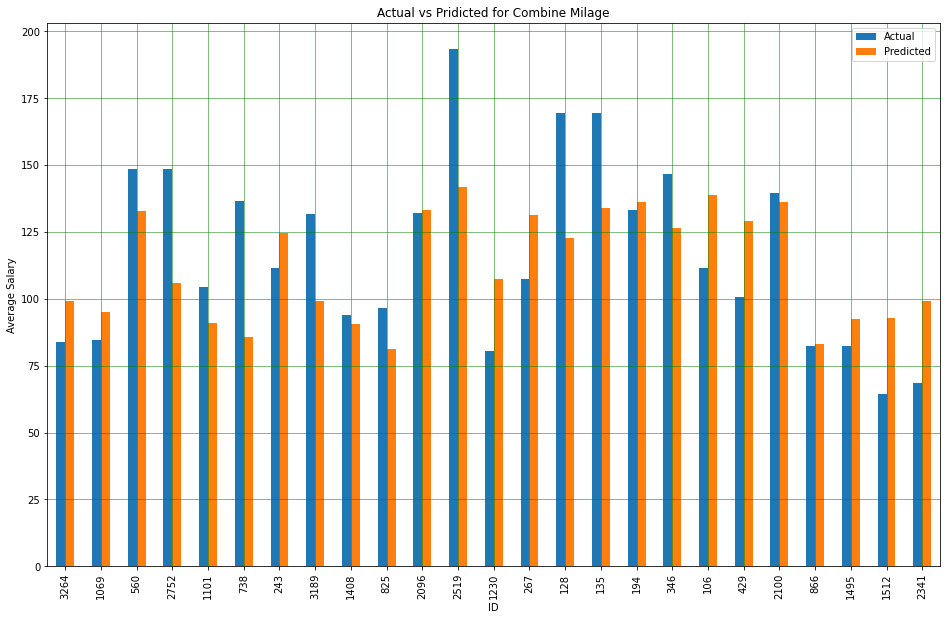

In [11]:
#create dictionary Actual vs prediction
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.tail() #tail

# Draw graph Actual vs Pridicted
df2 = df1.tail(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('ID')
plt.ylabel("Average Salary")
plt.title('Actual vs Pridicted for Combine Milage')
#plt.savefig('img/Figure 4b. Mpg(pridicted vs Actual).png', format='png') # save fig
plt.show()




#### extract 3 raqndom Sample and draw confusion Matrix

In [12]:
# Collect 3 Random Samples for prediction; from unseen data
Sample_X_test = X_test.sample(n=3, random_state=2)
print("Creating three random sample from mushroom dataset")
print("\nBelow test data is unseen by Model during it's training")
#prediction for 3 samples
pred = linear_reg.predict(Sample_X_test)
Sample_X_test
pred

Creating three random sample from mushroom dataset

Below test data is unseen by Model during it's training


array([141.60631317,  92.39466932, 133.78897528])

In [13]:
print("Featured 3 sample data used for prediction")
col_list = ['Job Title', 'Location State','Sector']
pd.DataFrame({'First Sample' : merged_df.iloc[2554][col_list],
              'Second Sample' : merged_df.iloc[1566][col_list],
              'Third Sample' : merged_df.iloc[135][col_list]}).T


Featured 3 sample data used for prediction


,Job Title,Location State,Sector
First Sample,Data Scientist,CA,Information Technology
Second Sample,Data Scientist,PA,Biotech & Pharmaceuticals
Third Sample,Data Scientist,NY,Business Services


In [14]:
Sample_Y_test = y_test.sample(n=3, random_state=2)
Sample_Y_test

2554    225.0
1566     96.5
135     169.5
Name: Average Salary, dtype: float64

In [15]:
from sklearn.metrics import confusion_matrix


print("\n1. Safe Model Confusion Matrix for Training Data :- \n")
pd.crosstab(Sample_Y_test,pred)
#confusion_matrix(Sample_Y_test.astype(int),pred.astype(int))
#pd.DataFrame(confusion_matrix(y_train,pred))
#pred
#pred1


1. Safe Model Confusion Matrix for Training Data :- 



col_0,92.394669,133.788975,141.606313
Average Salary,,,
96.5,1,0,0
169.5,0,1,0
225.0,0,0,1


Convert random sample to user readable

# Confusion Matrix

In [16]:
# Collect 3 Random Samples for prediction; from unseen data
pred1 = X_test.sample(n=3, random_state=2)
print("Creating three random sample from mushroom dataset")
print("\nBelow test data is unseen by Model during it's training")
pred1

Creating three random sample from mushroom dataset

Below test data is unseen by Model during it's training


,const,Job Title_Data Engineer,Job Title_Data Scientist,Location State_ CA,Location State_ DE,Location State_ FL,Location State_ IL,Location State_ NJ,Location State_ NY,Location State_ OH,...,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,"Sector_Restaurants, Bars & Food Services",Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism
2554,1.0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1566,1.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,1.0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Use K Fold cross validation to measure accuracy of our Linear Regression model

Tuning the Model
The model has some hyperparameters we can tune for hopefully better performance. For tuning the parameters of model, i m using mix of cross-validation and grid search. In Logistic Regression, the most important parameter to tune is the regularization parameter C. Note that the regularization parameter is not always part of the logistic regression model.

The regularization parameter is used to control for unlikely high regression coefficients, and in other cases can be used when data is sparse, as a method of feature selection.

Now implement some code to perform model tuning and selecting the regularization parameter $C$.

We use the following cv_score function to perform K-fold cross-validation and apply a scoring function to each test fold. In this incarnation we use accuracy score as the default scoring function.

In [18]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.26896289, 0.23069899, 0.27852024, 0.2807164 , 0.29096556,
       0.25513415, 0.21164411, 0.23703873, 0.29498022, 0.29959361])

In [19]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

#Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ValueError: Unknown label type: 'continuous'